In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Linear Regression

In linear regression, when presented with a dataset $(X, y)$ consisting of $n$ points and $p$ features, the goal is to determine the optimal affine relationship between the input and output variables. This entails finding real-valued weights $w_1, \dots, w_{p+1}$ that minimize the following expression:
$$\sum_{i=1}^n (w_1x_{i,1}+\dots+w_px_{i,p}+w_{p+1}-y_i)^2.$$
This minimization objective is equivalent to seeking the least squares solution of the equation:
$$\tilde{X}w=y ,$$
where $\tilde{X}$ is the augmented matrix obtained from $X$ by adding a column of $1$'s.

To find the solution to the least squares problem in linear regression using the singular value decomposition of $\tilde{X}$, we start with the compact singular value decomposition $(U, \Sigma, V)$ of $\tilde{X}$. Here's a breakdown of the components:

- $\Sigma$ is an invertible diagonal matrix of shape $(r, r)$, where $r$ is the rank of $\tilde{X}$. The diagonal entries of $\Sigma$ are the singular values of $\tilde{X}$.
- $U$ is a matrix of shape $(n, r)$, satisfying $U^T U = Id_r$. The columns of $U$ form an orthonormal basis for the column range of $\tilde{X}$.
- $V$ is a matrix of shape $(p+1, r)$, satisfying $V^T V = Id_r$. The columns of $V$ form an orthonormal basis for the row range of $\tilde{X}$.
- $\tilde{X} = U \Sigma V^T$.

The point in the column range of $\tilde{X}$ closest to $y$ is given by $UU^Ty$. Consequently, solving the least squares problem is equivalent to solving the following system of linear equations:
$$U \Sigma V^Tw = U U^T y$$
From this expression, it's evident that a solution is given by:
$$w = V \Sigma^{-1} U^T y$$

# Implementation

In [2]:
class LinearRegressor:
    def __init__(self):
        self.weights = None
    def fit(self,X,y):
        U,s,Vt = np.linalg.svd(np.concatenate((X,np.ones((N,1))),axis=1), full_matrices=False)
        S_inverse = np.diag([1/x if x>0 else 0 for x in s])
        self.weights = Vt.T @ S_inverse @ U.T @ y
    def predict(self,X):
        return np.concatenate((X,np.ones((N,1))),axis=1) @ self.weights

# Example

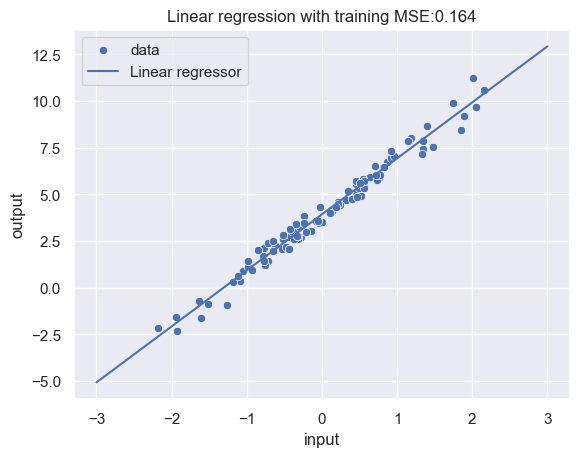

In [3]:
#create and visualize the dataset
np.random.seed(13)
N=100
X=np.random.randn(N,1)
X_aug = np.concatenate((X,np.ones((N,1))),axis=1)
y=X_aug@[3,4]+0.5*np.random.randn(N)
sns.scatterplot(x=X[:,0],y=y,label='data')
plt.xlabel('input')
plt.ylabel('output')

#fit a linear regressor and find training mse
lr=LinearRegressor()
lr.fit(X,y)
y_pred = lr.predict(X)
mse = ((y-y_pred)**2).mean()

#plot the regressor
xs=np.linspace(-3,3,100)
ys = lr.predict(xs.reshape(100,1))
sns.lineplot(x=xs,y=ys,label='Linear regressor')

plt.title(f'Linear regression with training MSE:{mse:.3f}');